In [43]:
import pandas as pd 
import numpy  as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
bank=pd.read_csv("C:/Users/ARAVINDH/Downloads/bank-full.csv")
bank.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Unnamed: 17,Unnamed: 18
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,NaN,NaN
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,NaN,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,NaN,NaN
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN,NaN
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN,NaN


In [4]:
#Dataset is not proper format beacuse datas are  separated by semi colon.
# So first changed datas into columns format.

In [5]:
#creating new column for job from discrete data to continous data

In [6]:
df=pd.DataFrame(bank)
print(df)


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [7]:
df['jobs']=pd.factorize(df['job'])[0]
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [8]:
le=LabelEncoder()
df['jobs']=le.fit_transform(df['job'])
print(df) 


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [9]:
df['jobs']=pd.factorize(df['job'],sort=True)[0]
print(df)


       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [10]:
bank.drop(["job"],axis=1,inplace=True)
bank  

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Unnamed: 17,Unnamed: 18,jobs
0,58,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,NaN,NaN,4
1,44,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,NaN,NaN,9
2,33,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,NaN,NaN,2
3,47,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN,NaN,1
4,33,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN,NaN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,NaN,NaN,9
45207,71,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,NaN,NaN,5
45208,72,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,NaN,NaN,5
45209,57,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,NaN,NaN,1


In [11]:
#creating  new column for martial to numerical data

In [12]:
df1=pd.DataFrame(bank)
df1['maritalstat']=pd.factorize(df1['marital'])[0]

In [13]:
le=LabelEncoder()
df1['maritalstat']=le.fit_transform(df['marital'])
print(df1)

       age   marital  education default  balance housing loan    contact  day  \
0       58   married   tertiary      no     2143     yes   no    unknown    5   
1       44    single  secondary      no       29     yes   no    unknown    5   
2       33   married  secondary      no        2     yes  yes    unknown    5   
3       47   married    unknown      no     1506     yes   no    unknown    5   
4       33    single    unknown      no        1      no   no    unknown    5   
...    ...       ...        ...     ...      ...     ...  ...        ...  ...   
45206   51   married   tertiary      no      825      no   no   cellular   17   
45207   71  divorced    primary      no     1729      no   no   cellular   17   
45208   72   married  secondary      no     5715      no   no   cellular   17   
45209   57   married  secondary      no      668      no   no  telephone   17   
45210   37   married  secondary      no     2971      no   no   cellular   17   

      month  duration  camp

In [14]:
df1['maritalstat']=pd.factorize(df1['marital'],sort=True)[0]
bank.drop(['marital'],axis=1,inplace=True)
bank


,age,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Unnamed: 17,Unnamed: 18,jobs,maritalstat
0,58,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,NaN,NaN,4,1
1,44,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,NaN,NaN,9,2
2,33,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,NaN,NaN,2,1
3,47,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN,NaN,1,1
4,33,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN,NaN,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,NaN,NaN,9,1
45207,71,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,NaN,NaN,5,0
45208,72,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,NaN,NaN,5,1
45209,57,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,NaN,NaN,1,1


In [15]:
# Now same creating new column for education to numerical

In [16]:
df2=pd.DataFrame(bank)
df2['edu']=pd.factorize(df2['education'])[0]


In [17]:
df2['edu']=le.fit_transform(df2['education'])
df2['edu']=pd.factorize(df2['education'],sort=True)[0]
bank.drop(['education'],axis=1,inplace=True)
bank

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Unnamed: 17,Unnamed: 18,jobs,maritalstat,edu
0,58,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,NaN,NaN,4,1,2
1,44,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,NaN,NaN,9,2,1
2,33,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,NaN,NaN,2,1,1
3,47,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN,NaN,1,1,3
4,33,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN,NaN,11,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,NaN,NaN,9,1,2
45207,71,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,NaN,NaN,5,0,0
45208,72,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,NaN,NaN,5,1,1
45209,57,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,NaN,NaN,1,1,1


In [18]:
# Now creating new column for default to numerical

In [19]:
df3=pd.DataFrame(bank)
df3['defalt']=pd.factorize(df3['default'])[0]


In [20]:
df3['defalt']=le.fit_transform(df3['default'])
df3['defalt']=pd.factorize(df3['default'],sort=True)[0]
bank.drop(['default'],axis=1,inplace=True)
bank

,age,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Unnamed: 17,Unnamed: 18,jobs,maritalstat,edu,defalt
0,58,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,NaN,NaN,4,1,2,0
1,44,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,NaN,NaN,9,2,1,0
2,33,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,NaN,NaN,2,1,1,0
3,47,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN,NaN,1,1,3,0
4,33,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN,NaN,11,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,NaN,NaN,9,1,2,0
45207,71,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,NaN,NaN,5,0,0,0
45208,72,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,NaN,NaN,5,1,1,0
45209,57,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,NaN,NaN,1,1,1,0


In [21]:
#Again now for creating new column for housing to numerical

In [22]:
df4=pd.DataFrame(bank)
df4['house']=pd.factorize(df4['housing'])[0]

In [23]:
df4['house']=le.fit_transform(df4['housing'])
df4['house']=pd.factorize(df4['housing'],sort=True)[0]
bank.drop(['housing'],axis=1,inplace=True)
bank

,age,balance,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Unnamed: 17,Unnamed: 18,jobs,maritalstat,edu,defalt,house
0,58,2143,no,unknown,5,may,261,1,-1,0,unknown,no,NaN,NaN,4,1,2,0,1
1,44,29,no,unknown,5,may,151,1,-1,0,unknown,no,NaN,NaN,9,2,1,0,1
2,33,2,yes,unknown,5,may,76,1,-1,0,unknown,no,NaN,NaN,2,1,1,0,1
3,47,1506,no,unknown,5,may,92,1,-1,0,unknown,no,NaN,NaN,1,1,3,0,1
4,33,1,no,unknown,5,may,198,1,-1,0,unknown,no,NaN,NaN,11,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,no,cellular,17,nov,977,3,-1,0,unknown,yes,NaN,NaN,9,1,2,0,0
45207,71,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes,NaN,NaN,5,0,0,0,0
45208,72,5715,no,cellular,17,nov,1127,5,184,3,success,yes,NaN,NaN,5,1,1,0,0
45209,57,668,no,telephone,17,nov,508,4,-1,0,unknown,no,NaN,NaN,1,1,1,0,0


In [24]:
#same new column for loan to numerical

In [25]:
df5=pd.DataFrame(bank)
df5['loann']=pd.factorize(df5['loan'])[0]

In [26]:
df5['loann']=le.fit_transform(df5['loan'])
df5['loann']=pd.factorize(df5['loan'],sort=True)[0]
bank.drop(['loan'],axis=1,inplace=True)
bank

,age,balance,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Unnamed: 17,Unnamed: 18,jobs,maritalstat,edu,defalt,house,loann
0,58,2143,unknown,5,may,261,1,-1,0,unknown,no,NaN,NaN,4,1,2,0,1,0
1,44,29,unknown,5,may,151,1,-1,0,unknown,no,NaN,NaN,9,2,1,0,1,0
2,33,2,unknown,5,may,76,1,-1,0,unknown,no,NaN,NaN,2,1,1,0,1,1
3,47,1506,unknown,5,may,92,1,-1,0,unknown,no,NaN,NaN,1,1,3,0,1,0
4,33,1,unknown,5,may,198,1,-1,0,unknown,no,NaN,NaN,11,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,cellular,17,nov,977,3,-1,0,unknown,yes,NaN,NaN,9,1,2,0,0,0
45207,71,1729,cellular,17,nov,456,2,-1,0,unknown,yes,NaN,NaN,5,0,0,0,0,0
45208,72,5715,cellular,17,nov,1127,5,184,3,success,yes,NaN,NaN,5,1,1,0,0,0
45209,57,668,telephone,17,nov,508,4,-1,0,unknown,no,NaN,NaN,1,1,1,0,0,0


In [27]:
#converting month into numerical data

In [28]:
df6=pd.DataFrame(bank)
df6['months']=pd.factorize(df6['month'])[0]
df6['months']=le.fit_transform(df6['month'])
bank.drop(['month'],axis=1,inplace=True)
bank

,age,balance,contact,day,duration,campaign,pdays,previous,poutcome,y,Unnamed: 17,Unnamed: 18,jobs,maritalstat,edu,defalt,house,loann,months
0,58,2143,unknown,5,261,1,-1,0,unknown,no,NaN,NaN,4,1,2,0,1,0,8
1,44,29,unknown,5,151,1,-1,0,unknown,no,NaN,NaN,9,2,1,0,1,0,8
2,33,2,unknown,5,76,1,-1,0,unknown,no,NaN,NaN,2,1,1,0,1,1,8
3,47,1506,unknown,5,92,1,-1,0,unknown,no,NaN,NaN,1,1,3,0,1,0,8
4,33,1,unknown,5,198,1,-1,0,unknown,no,NaN,NaN,11,2,3,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,cellular,17,977,3,-1,0,unknown,yes,NaN,NaN,9,1,2,0,0,0,9
45207,71,1729,cellular,17,456,2,-1,0,unknown,yes,NaN,NaN,5,0,0,0,0,0,9
45208,72,5715,cellular,17,1127,5,184,3,success,yes,NaN,NaN,5,1,1,0,0,0,9
45209,57,668,telephone,17,508,4,-1,0,unknown,no,NaN,NaN,1,1,1,0,0,0,9


In [29]:
#Removing contact,previous and poutcome becouse these are not good parameter for predicting Y

In [30]:
bank.drop(['contact'],axis=1,inplace=True)
bank.drop(['previous'],axis=1,inplace=True)
bank.drop(['poutcome'],axis=1,inplace=True)
bank.drop(['Unnamed: 17'],axis=1,inplace=True)
bank.drop(['Unnamed: 18'],axis=1,inplace=True)
bank

,age,balance,day,duration,campaign,pdays,y,jobs,maritalstat,edu,defalt,house,loann,months
0,58,2143,5,261,1,-1,no,4,1,2,0,1,0,8
1,44,29,5,151,1,-1,no,9,2,1,0,1,0,8
2,33,2,5,76,1,-1,no,2,1,1,0,1,1,8
3,47,1506,5,92,1,-1,no,1,1,3,0,1,0,8
4,33,1,5,198,1,-1,no,11,2,3,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,yes,9,1,2,0,0,0,9
45207,71,1729,17,456,2,-1,yes,5,0,0,0,0,0,9
45208,72,5715,17,1127,5,184,yes,5,1,1,0,0,0,9
45209,57,668,17,508,4,-1,no,1,1,1,0,0,0,9


In [31]:
#Now converting o/p y into numerical data

In [32]:
df7=pd.DataFrame(bank)
df7['tar']=pd.factorize(df7['y'])[0]
df7['tar']=le.fit_transform(df7['y'])
df7['tar']=pd.factorize(df7['y'],sort=True)[0]
bank.drop(['y'],axis=1,inplace=True)
print(bank)


       age  balance  day  duration  campaign  pdays  jobs  maritalstat  edu  \
0       58     2143    5       261         1     -1     4            1    2   
1       44       29    5       151         1     -1     9            2    1   
2       33        2    5        76         1     -1     2            1    1   
3       47     1506    5        92         1     -1     1            1    3   
4       33        1    5       198         1     -1    11            2    3   
...    ...      ...  ...       ...       ...    ...   ...          ...  ...   
45206   51      825   17       977         3     -1     9            1    2   
45207   71     1729   17       456         2     -1     5            0    0   
45208   72     5715   17      1127         5    184     5            1    1   
45209   57      668   17       508         4     -1     1            1    1   
45210   37     2971   17       361         2    188     2            1    1   

       defalt  house  loann  months  tar  
0       

In [33]:
bank.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'jobs',
       'maritalstat', 'edu', 'defalt', 'house', 'loann', 'months', 'tar'],
      dtype='object')

In [ ]:
#MODEL BUILDING

In [36]:
logit_model= sm.logit('tar~age+balance+day+duration+campaign+pdays+jobs+maritalstat+edu+defalt+house+loann+months',data = bank).fit()

Optimization terminated successfully.
         Current function value: 0.276118
         Iterations 7


In [37]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    tar   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45197
Method:                           MLE   Df Model:                           13
Date:                Thu, 04 Feb 2021   Pseudo R-squ.:                  0.2349
Time:                        18:23:47   Log-Likelihood:                -12484.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.4161      0.118    -29.012      0.000      -3.647      -3.185
age             0.0054      0.002      3.259      0.001       0.002       0.009
balance      2.037e-05   4.47e-06      4.558      0.000    1.16e-05    2.91e-05
day            -0.0029      0.002     -1.428      0.153      -0.007       0.001
duration        0.0039   5.96e-05     65.107      0.000       0.004       0.004
campaign       -0.1311      0.010    -13.320      0.000      -0.150      -0.112
pdays           0.0037      0.000     26.360      0.000       0.003       0.004
jobs            0.0137      0.005      2.586      0.010       0.003       0.024
maritalstat     0.2287      0.031      7.457      0.000       0.169       0.289
edu             0.2223      0.022      9.910      0.000       0.178       0.266
defalt         -0.3569      0.158     -2.260      0.024      -0.667      -0.047
house          -1.1674      0.037    -31.190      0.000      -1.241      -1.094
loann          -0.6536      0.056    -11.609      0.000      -0.764      -0.543
months          0.0012      0.005      0.223      0.824      -0.009       0.012
===============================================================================
"""

In [40]:
y= logit_model.predict(bank)
bank["pred"]=y

In [42]:
#creating empty column for target
bank["tar_val"]=0
bank.loc[y>=0.5,"tar_val"] = 1
bank.tar_val

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    0
45208    1
45209    0
45210    0
Name: tar_val, Length: 45211, dtype: int64

In [44]:
classification_report(bank.tar_val,bank.tar)

'              precision    recall  f1-score   support\n\n           0       0.98      0.90      0.94     43398\n           1       0.20      0.60      0.30      1813\n\n    accuracy                           0.89     45211\n   macro avg       0.59      0.75      0.62     45211\nweighted avg       0.95      0.89      0.92     45211\n'

In [ ]:
#CONFUSION MATRIX

In [52]:
confusion_matrix = pd.crosstab(bank['tar'],bank.tar_val)
confusion_matrix

tar_val,0,1
tar,,
0,39188,734
1,4210,1079


In [53]:
accuracy = (39188+1079)/(45211) # 89.06
accuracy

0.8906460817057795

In [ ]:
# ROC curve 

In [47]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(bank.tar, y)

Text(0, 0.5, 'True Positive')

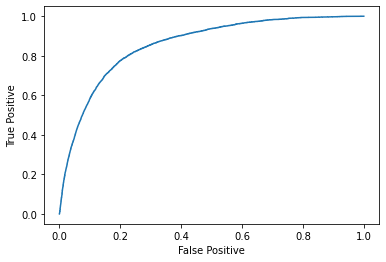

In [48]:
plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")

In [50]:
roc= metrics.auc(fpr, tpr) 

In [51]:
roc   

0.8585256138863864

In [ ]:
# area under ROC curve = more than 85% .SO IT IS GOOD MODEL.